# 第二题：支持向量机的软间隔

实验内容：

1. 了解分离超平面、间隔超平面与支持向量的绘制
2. 调整C的值，绘制分离超平面、间隔超平面和支持向量
3. 简述引入软间隔的原因，以及C值对SVM的影响

## 1. 导入模型

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.svm import SVC

## 2. 制造数据集

In [2]:
np.random.seed(2)
X = np.r_[np.random.randn(20, 2) - [0, 2], np.random.randn(20, 2) + [0, 2]]
Y = [0] * 20 + [1] * 20

我们把数据$X$的第一列，记为$x_1$，第二列记为$x_2$

可视化

In [3]:
def plot_data(X, Y):
    # 新建一个 8 × 8 的图
    plt.figure(figsize = (8, 8))

    # 绘制散点图
    plt.scatter(X[:, 0], X[:, 1], c = Y, cmap = plt.cm.Paired, edgecolors = 'k')

    # 设置横纵坐标标签
    plt.xlabel('x1')
    plt.ylabel('x2')

    # 设定图的范围
    plt.xlim((-4, 4))
    plt.ylim((-4, 4))

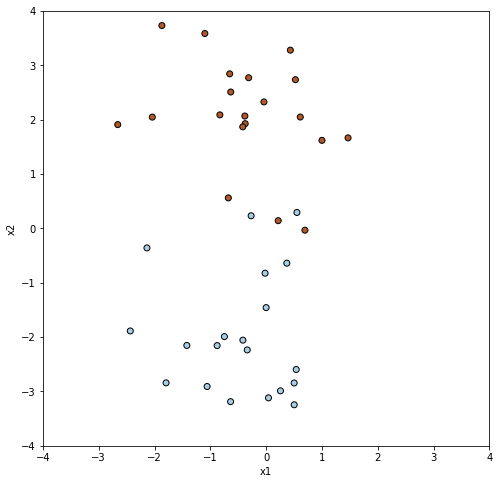

In [4]:
plot_data(X, Y)

## 3. 训练模型

这里我们使用线性核函数，C设定为100

In [5]:
# 创建模型
clf = SVC(kernel = 'linear', C = 100, random_state = 32)

# 训练模型
clf.fit(X, Y)

SVC(C=100, kernel='linear', random_state=32)

## 4. 绘制超平面

在二维平面中，我们将SVM参数写为$w_0$和$w_1$，截距为$b$。

超平面方程为：

$$
w^{\mathrm{T}} x + b = 0
$$

写成分量形式为：

$$
w_0 x_1 + w_1 x_2 + b = 0
$$

等价于：

$$
x_2 = - \frac{w_0}{w_1} x_1 - \frac{b}{w_1}
$$

所以我们可以在上面的图中，绘制这个分离超平面，上图中，纵坐标为$x_2$，横坐标为$x_1$，我们可以通过SVC的coef_属性获取$w$，通过intercept_获取$b$。

画图的时候我们可以给定任意两点，如x1等于-5和5的点，计算出这两个点的x2值，然后通过连线的方式，绘制出超平面

In [7]:
def compute_hyperplane(model, x1):
    '''
    计算二维平面上的分离超平面，
    我们通过w0，w1，b以及x1计算出x2，只不过这里的x1是一个ndarray，x2也是一个ndarray
    
    Parameters
    ----------
    model: sklearn中svm的模型
    
    x1: numpy.ndarray，如[-5, 5]，表示超平面上这些点的横坐标
    
    Returns
    ----------
    x2: numpy.ndarray, 对应的纵坐标
    
    '''
    w0 = model.coef_[0][0]
    w1 = model.coef_[0][1]
    b = model.intercept_[0]

    # YOUR CODE HERE
    x2 = -x1*(w0/w1) - (b/w1)
    
    return x2

In [8]:
# 测试样例
x1t = np.array([-5, 5])
x2t = compute_hyperplane(clf, x1t)
print(x2t) # [ 2.05713424 -2.27000147]

[ 2.05713424 -2.27000147]


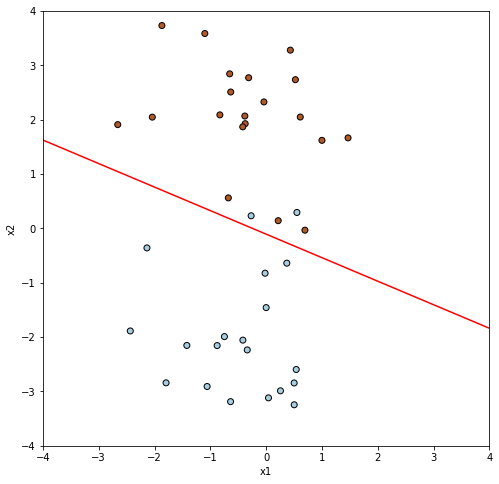

In [9]:
# 绘制数据
plot_data(X, Y)

# 在横坐标上选两个点
x1 = np.array([-5, 5])

# 计算超平面上这两个点的对应纵坐标
x2 = compute_hyperplane(clf, x1)

# 绘制这两点连成的直线
plt.plot(x1, x2, '-', color = 'red')

## 5. 绘制间隔

根据SVM的原理，间隔超平面的方程是：

$$
w^{\mathrm{T}}x + b = \pm 1
$$

我们先讨论右侧为1的情况：

$$
w^{\mathrm{T}}x + b = 1
$$

写成分量形式：

$$
w_0 x_1 + w_1 x_2 + b = 1
$$

根据上面第四节的变换，可以得到：

$$
x2 = \frac{1}{w_1} - \frac{w_0}{w_1} x_1 - \frac{b}{w_1}
$$

同理，当右侧为-1时，可得：

$$
x2 = - \frac{1}{w_1} - \frac{w_0}{w_1} x_1 - \frac{b}{w_1}
$$

**可以发现，间隔超平面的方程就是在分离超平面上增加或减去$\frac{1}{w_1}$**

In [15]:
def compute_margin(model, x1):
    '''
    计算二维平面上的间隔超平面，
    我们通过w0，w1，b以及x1计算出x2，只不过这里的x1是一个ndarray，x2也是一个ndarray
    
    Parameters
    ----------
    model: sklearn中svm的模型
    
    x1: numpy.ndarray，如[-5, 5]，表示超平面上这些点的横坐标
    
    Returns
    ----------
    x2_up: numpy.ndarray, 一条间隔超平面上对应的纵坐标
    
    x2_down: numpy.ndarray, 另一条间隔超平面上对应的纵坐标
    
    '''
    
    # 先调用compute_hyperplane计算超平面的纵坐标
    x2 = compute_hyperplane(model, x1)
    
    w1 = model.coef_[0][1]
    
    # YOUR CODE HERE
    x2_up = 1/w1 + x2
    
    # YOUR CODE HERE
    x2_down = -1/w1 + x2
    
    return x2_up, x2_down

In [16]:
# 测试样例
x1t = np.array([-5, 5])
x2_upt, x2_downt = compute_margin(clf, x1t)
print(x2_upt)     # [ 2.43100836 -1.89612735]
print(x2_downt)   # [ 1.68326012 -2.64387559]

[ 2.43100836 -1.89612735]
[ 1.68326012 -2.64387559]


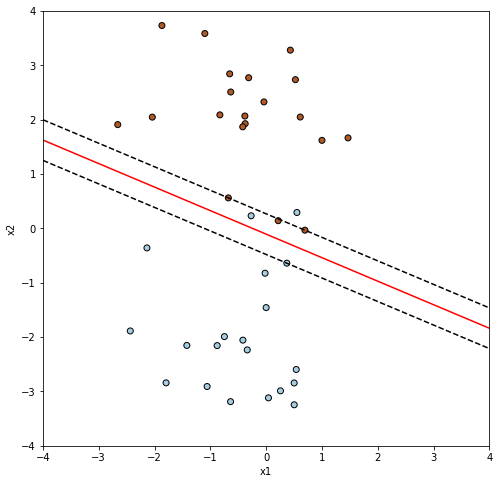

In [14]:
# 绘制数据
plot_data(X, Y)

# 在横坐标上选两个点
x1 = np.array([-5, 5])

# 计算超平面上这两个点的对应纵坐标
x2 = compute_hyperplane(clf, x1)

# 计算间隔超平面上这两个点的对应纵坐标
x2_up, x2_down = compute_margin(clf, x1)

# 绘制分离超平面和间隔超平面
plt.plot(x1, x2, '-', color = 'red')
plt.plot(x1, x2_up, 'k--')
plt.plot(x1, x2_down, 'k--')

## 6. 标出支持向量

模型的support_vectors_属性包含了支持向量

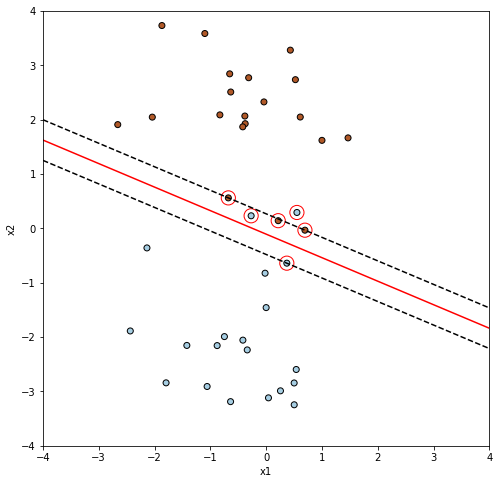

In [17]:
# 绘制数据
plot_data(X, Y)

# 在横坐标上选两个点
x1 = np.array([-5, 5])

# 计算超平面上这两个点的对应纵坐标
x2 = compute_hyperplane(clf, x1)

# 计算间隔超平面上这两个点的对应纵坐标
x2_up, x2_down = compute_margin(clf, x1)

# 绘制分离超平面和间隔超平面
plt.plot(x1, x2, '-', color = 'red')
plt.plot(x1, x2_up, 'k--')
plt.plot(x1, x2_down, 'k--')

# 标出支持向量
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 200, facecolors = 'none', edgecolors = 'red')

# 作业1：请你使用线性核，调整C的值，绘制数据集，SVM分离超平面，间隔超平面以及支持向量

## 1. C = 10

In [18]:
# YOUR CODE HERE
# 创建模型
clf1 = SVC(kernel = 'linear', C = 10, random_state = 32)

# 训练模型
clf1.fit(X, Y)

SVC(C=10, kernel='linear', random_state=32)

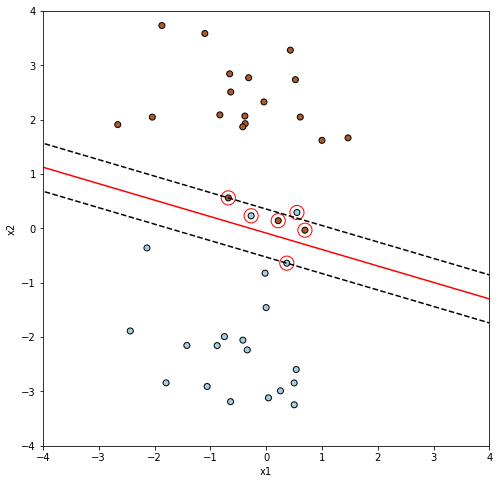

In [19]:
# 绘制数据
plot_data(X, Y)

# 在横坐标上选两个点
x1 = np.array([-5, 5])

# 计算超平面上这两个点的对应纵坐标
x2 = compute_hyperplane(clf1, x1)

# 计算间隔超平面上这两个点的对应纵坐标
x2_up, x2_down = compute_margin(clf1, x1)

# 绘制分离超平面和间隔超平面
plt.plot(x1, x2, '-', color = 'red')
plt.plot(x1, x2_up, 'k--')
plt.plot(x1, x2_down, 'k--')

# 标出支持向量
plt.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1], s = 200, facecolors = 'none', edgecolors = 'red')

## 2. C = 1

In [20]:
# YOUR CODE HERE
# 创建模型
clf2 = SVC(kernel = 'linear', C = 1, random_state = 32)

# 训练模型
clf2.fit(X, Y)

SVC(C=1, kernel='linear', random_state=32)

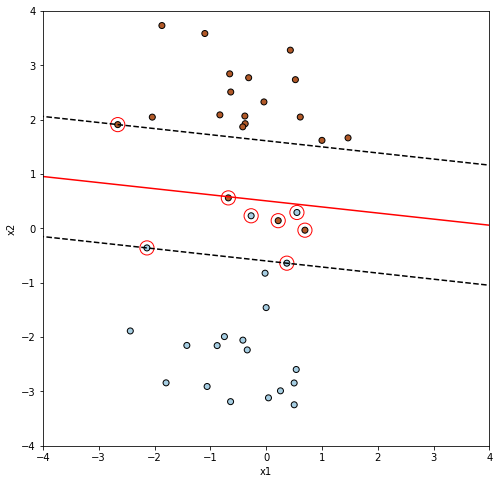

In [21]:
# 绘制数据
plot_data(X, Y)

# 在横坐标上选两个点
x1 = np.array([-5, 5])

# 计算超平面上这两个点的对应纵坐标
x2 = compute_hyperplane(clf2, x1)

# 计算间隔超平面上这两个点的对应纵坐标
x2_up, x2_down = compute_margin(clf2, x1)

# 绘制分离超平面和间隔超平面
plt.plot(x1, x2, '-', color = 'red')
plt.plot(x1, x2_up, 'k--')
plt.plot(x1, x2_down, 'k--')

# 标出支持向量
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s = 200, facecolors = 'none', edgecolors = 'red')

## 3. C = 0.1

In [22]:
# YOUR CODE HERE
# 创建模型
clf3 = SVC(kernel = 'linear', C = 0.1, random_state = 32)

# 训练模型
clf3.fit(X, Y)

SVC(C=0.1, kernel='linear', random_state=32)

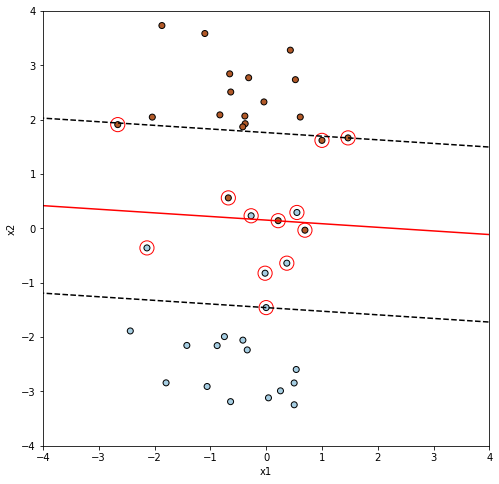

In [23]:
# 绘制数据
plot_data(X, Y)

# 在横坐标上选两个点
x1 = np.array([-5, 5])

# 计算超平面上这两个点的对应纵坐标
x2 = compute_hyperplane(clf3, x1)

# 计算间隔超平面上这两个点的对应纵坐标
x2_up, x2_down = compute_margin(clf3, x1)

# 绘制分离超平面和间隔超平面
plt.plot(x1, x2, '-', color = 'red')
plt.plot(x1, x2_up, 'k--')
plt.plot(x1, x2_down, 'k--')

# 标出支持向量
plt.scatter(clf3.support_vectors_[:, 0], clf3.support_vectors_[:, 1], s = 200, facecolors = 'none', edgecolors = 'red')

# 作业2：简述为什么要加入软间隔？C的值对SVM有什么影响？

### 加入软间隔的原因

通常情况下，对于含有噪声的数据，按照我们原始的约束条件进行处理时会造成一定的误差。加入间隔的目的是使得SVM忽略一定范围的噪声。

因此，我们使用软间隔的方法，引入松弛变量。C的值即我们引入的松弛变量的权重。

### C值对SVM的影响

由上述我们绘制的实验结果可知，C的值越大，虚线与直线间的间隔越小，离群点越不希望被出现。C作为惩罚参数，C较大，对误分类的惩罚增大；C较小，表示找到的数据的间隔越宽越好